<a href="https://colab.research.google.com/github/BeatrizPCandido/pretalab-ciclo14-git-github/blob/main/Aula_21_Pr%C3%A1tica_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prática de exercícios de estatística em Python

## Objetivos

* Aplicar conceitos de estatística descritiva ao dataset Coffee Sales
* Analisar distribuições e probabilidades
* Realizar amostragem e testes de hipóteses
* Interpretar resultados de forma crítica e aplicada

## Dataset: `vendas_cafeteria.csv`

Cada linha representa uma venda individual em uma cafeteria, incluindo:
- Data e hora da compra  
- Tipo de café vendido  
- Valor pago  
- Tipo de pagamento  
- Período do dia, dia da semana e mês  

Arquivo: https://drive.google.com/file/d/1JUF9uI-nC0bbcWjBw8hnPWRcGNLfWNqI/view?usp=sharing

In [1]:
#Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações
sns.set(style="whitegrid", palette="Set2")
plt.rcParams['figure.figsize'] = (8,4)
pd.options.plotting.backend = "plotly"

In [3]:
# Carregar o dataset
df = pd.read_csv("/content/.config/vendas_cafeteria (2).csv")

## Aquecimento


1. Mostrar as 5 primeiras linhas.
2. Exibir informações e tipos de dados (.info()).

In [4]:
df.head()

,hora_do_dia,tipo_pagamento,valor,nome_cafe,periodo_do_dia,dia_da_semana,mes,ordem_dia,ordem_mes,data,hora
0,10,cartão,38.7,Latte,Manhã,Sex,Março,5,3,2024-03-01,10:15:50.520000
1,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:19:22.539000
2,12,cartão,38.7,Chocolate Quente,Tarde,Sex,Março,5,3,2024-03-01,12:20:18.089000
3,13,cartão,28.9,Café Americano,Tarde,Sex,Março,5,3,2024-03-01,13:46:33.006000
4,13,cartão,38.7,Latte,Tarde,Sex,Março,5,3,2024-03-01,13:48:14.626000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hora_do_dia     3547 non-null   int64  
 1   tipo_pagamento  2698 non-null   object 
 2   valor           3547 non-null   float64
 3   nome_cafe       3547 non-null   object 
 4   periodo_do_dia  3547 non-null   object 
 5   dia_da_semana   3547 non-null   object 
 6   mes             3547 non-null   object 
 7   ordem_dia       3547 non-null   int64  
 8   ordem_mes       3547 non-null   int64  
 9   data            3547 non-null   object 
 10  hora            3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


## Exercício 1 — Estatística descritiva


1. Calcule as estatísticas descritivas (.describe()) e observe as medidas de posição e dispersão (média, mediana, desvio padrão). Responda:
- O que a média representa?

- O que o desvio padrão mostra sobre as vendas?

- Compare o valor da média com o da mediana

2. Escolha uma das variáveis, visualize suas estatísticas com diagrama de caixa (BoxPlot) e responda: os dados são mais concentrados ou dispersos? existem valores atípicos (outliers)?

In [6]:
df.describe()

,hora_do_dia,valor,ordem_dia,ordem_mes
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


Text(0.5, 0, 'Valor')

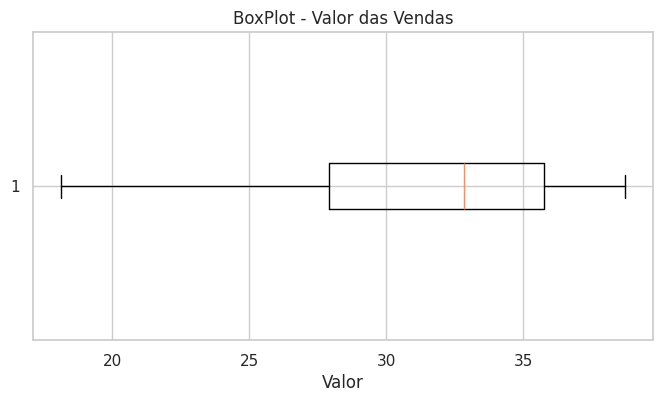

In [7]:
plt.boxplot(df['valor'], vert=False)
plt.title('BoxPlot - Valor das Vendas')
plt.xlabel('Valor')

{'whiskers': [<matplotlib.lines.Line2D at 0x781814212a20>,
 'caps': [<matplotlib.lines.Line2D at 0x781814212f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x781814212720>],
 'medians': [<matplotlib.lines.Line2D at 0x781814213470>],
 'fliers': [<matplotlib.lines.Line2D at 0x781814213890>],
 'means': []}

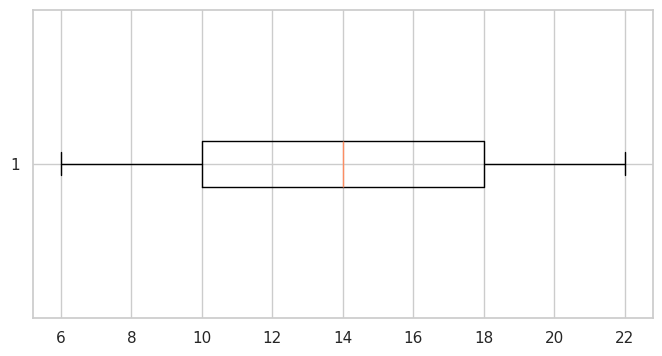

In [8]:
plt.boxplot(df['hora_do_dia'], vert=False)

## Exercício 2 — Distribuição de Probabilidade

1. Analise o comportamento da variável `valor` e responda:
* A distribuição é simétrica ou assimétrica?

* Existem valores atípicos (outliers)?

* O comportamento se aproxima de uma distribuição normal?

In [9]:
df['valor'].plot(kind='hist', title='Histograma Valor de Vendas')

Text(0.5, 1.0, 'Histograma Valor de Vendas')

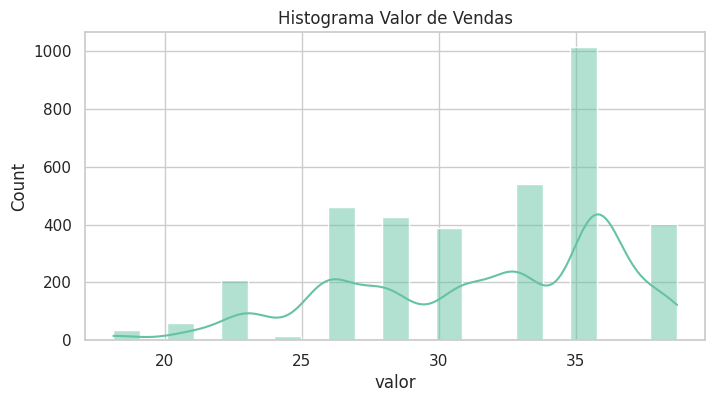

In [10]:
sns.histplot(df['valor'], kde=True)
plt.title('Histograma Valor de Vendas')

<Axes: xlabel='hora_do_dia', ylabel='Count'>

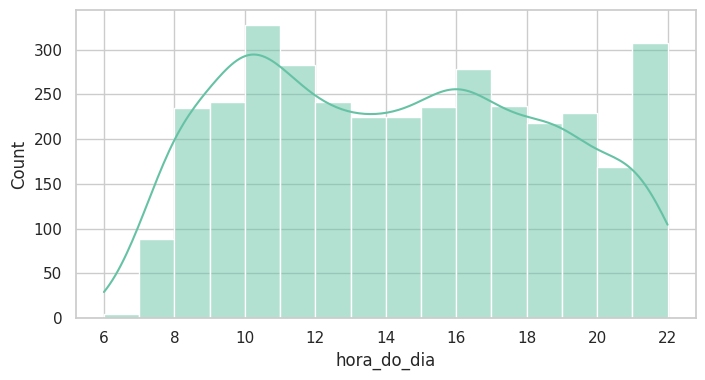

In [11]:
sns.histplot(df['hora_do_dia'], kde=True)

In [12]:
df['hora_do_dia'].plot(kind='hist')

## Exercício 3 — Probabilidade aplicada


1. Qual é a probabilidade empírica (calculada a partir dos dados) de uma venda ser maior que R$ 20, R$ 40 ou R$ 60?


2. Supondo uma distribuição normal, qual a probabilidade teórica de uma venda estar entre R$20 e R$40?



In [13]:
p_maior_20 = np.sum(df['valor']>20)/len(df['valor'])
p_maior_20

np.float64(0.9898505779531999)

In [14]:
np.mean(df['valor']>20)

np.float64(0.9898505779531999)

In [15]:
np.mean(df['valor']>40)

np.float64(0.0)

In [16]:
np.mean(df['valor']>60)

np.float64(0.0)

In [17]:
media = df['valor'].mean()
media

np.float64(31.64521567521849)

In [18]:
desvio = df['valor'].std()
desvio

4.877753703590957

Text(0, 0.5, 'Densidade de probabilidade')

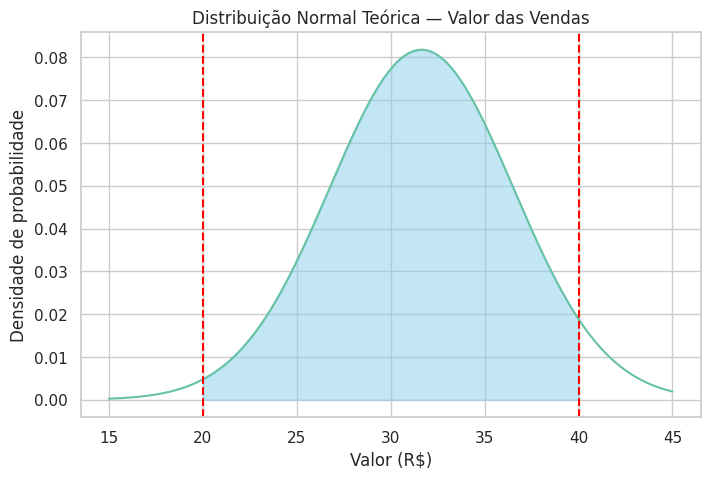

In [19]:
from scipy.stats import norm
# Gerar intervalo de valores para o eixo x
x = np.linspace(15, 45, 500)

# Calcular a densidade da distribuição normal
y = norm.pdf(x, media, desvio)

# Plotar a curva da distribuição normal
plt.figure(figsize=(8,5))
plt.plot(x, y, label='Distribuição Normal (Valor das Vendas)')

# Área entre 20 e 40
x_fill = np.linspace(20, 40, 300)
y_fill = norm.pdf(x_fill, media, desvio)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.5, label='Área entre R$20 e R$40')

# Linhas de referência
plt.axvline(20, color='red', linestyle='--')
plt.axvline(40, color='red', linestyle='--')

plt.title("Distribuição Normal Teórica — Valor das Vendas")
plt.xlabel("Valor (R$)")
plt.ylabel("Densidade de probabilidade")

| Conceito                  | Explicação simples                           |
| ------------------------- | -------------------------------------------- |
| **Média (μ)**             | O valor mais comum (centro da curva)         |
| **Desvio padrão (σ)**     | Mede o quanto os valores se afastam da média |
| **Distribuição normal**   | A famosa curva em forma de sino              |
| **Probabilidade teórica** | Área sob a curva entre dois valores          |
| **Função `norm.cdf`**     | Mede “quanta área tem até um ponto”          |


## Exercício 4 — Amostragem

1. Crie três amostras aleatórias dos valores de venda: n = 30, 100, 300.
2. Compare as médias dessas amostras com a média geral da variável.

In [20]:
# Crie três amostras aleatórias dos valores de venda: n = 30, 100, 300.
amostra_30 = df['valor'].sample(n=30)
amostra_100 = df['valor'].sample(n=100)
amostra_300 = df['valor'].sample(n=300)


In [22]:
# Compare as médias dessas amostras com a média geral da variável.
media_geral = df['valor'].mean()
media_amostra_30 = amostra_30.mean()
media_amostra_100 = amostra_100.mean()
media_amostra_300 = amostra_300.mean()
print(f'Média Geral: {media_geral}')
print(f'Média Amostra 30: {media_amostra_30}')
print(f'Média Amostra 100: {media_amostra_100}')

Média Geral: 31.64521567521849
Média Amostra 30: 31.545999999999996
Média Amostra 100: 30.5366
